## Chicago Crime Forecasting (2012-2017)
### Anil Abraham 2023

#### The goal of this project is to use machine learning techniques to forecast crime in Boston. Particularly, forecasting type of crime, number of crimes committed in a year, and crime hotspots.

### Brief explanation of each column:
<ul>
<li>Unnamed: 0  - No idea what this is</li>
<li>ID - Unique crime identifier</li>
<li>Case Number - Unique case number recorded by Chicago PD</li>
<li>Date - Estimate Of when incident occured</li>
<li>IUCR - Illinois Uniform Crime Reporting code</li>
<li>Primary Type  - Primary description of IUCR code</li>
<li>Description - Secondary description of IUCR code</li>
<li>Location Description - Description of where incident occured</li>
<li>Arrest - Whether an arrest was made or not</li>
<li>Domestic - Whether incident was domestic-related or not</li>
<li>Beat - Smallest police geographic area</li>
<li>Block/District/Ward/Community Area/X Coordinate/Y Coordinate/Latitude/Longitude/Location - Location</li>
<li>FBI Code - Classification of crime according to the FBI's National Incident-Based Reporting System (NIBRS)</li>
<li>Year - Year that incident occured</li>
<li>Updated On - Date and time incident was last updated</li>
</ul>



### Importing libraries

In [34]:
import pandas as pd #Pandas for data manipulation and analysis
import numpy as np #Numpy for matrices
import geopandas as gpd #Support for geospatial data
from shapely.geometry import Point, Polygon #Geographic information systems functions and analysis
import matplotlib.pyplot as plt #Matplotlib for visualisations
import seaborn as sns
import plotly.express as px
#pd.set_option('display.max_rows', None)

### Loading dataset

In [35]:
df = pd.read_csv('chicago.csv', encoding='latin') #Thousands are seperated by commas in the CSV.

for col in df.columns.to_list(): #List all feature names
    print(col)

Unnamed: 0
ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Latitude
Longitude
Location


### Data preprocessing

In [36]:
print(f'Null values found\n{df.isna().sum()}') #Check for null values

Null values found
Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64


#### Only certain columns are of interest to us, so let's drop the rest.

In [38]:
df.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On'
         , 'Location', 'Beat', 'District'], axis=1, inplace=True)

#### Let's take a look at the first 5 rows of the dataset

In [39]:
df.head(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


#### What are the datatypes used?

In [43]:
df.dtypes

Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Latitude                float64
Longitude               float64
dtype: object

### EDA

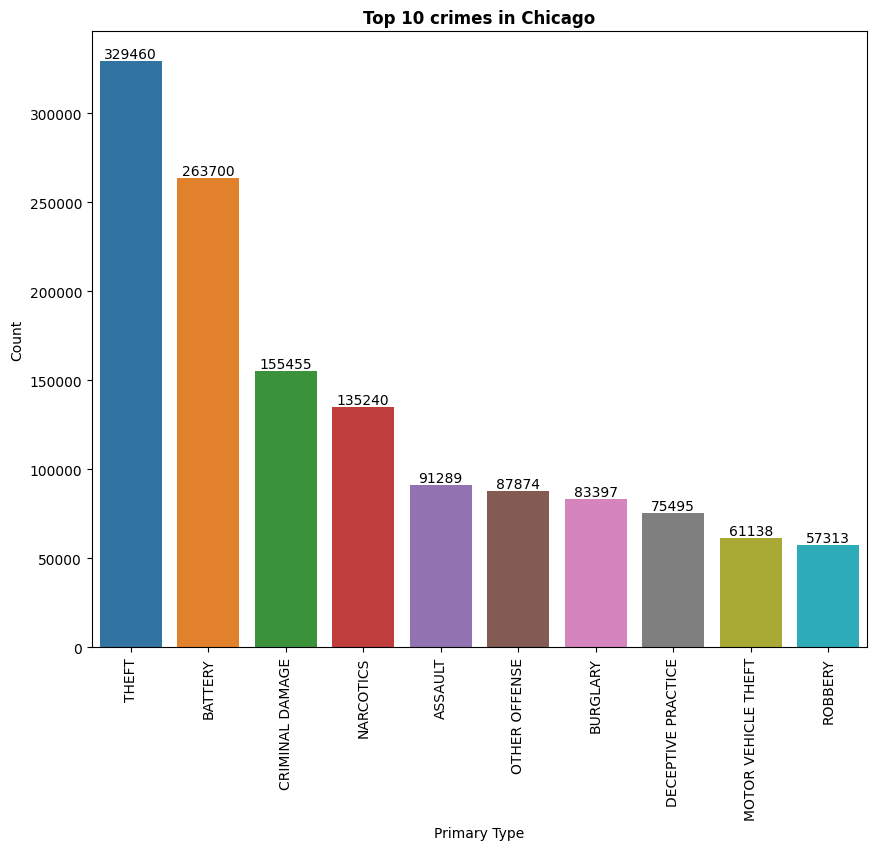

In [40]:
topcrimes = df['Primary Type'].value_counts()[:10]
plt.figure(figsize=(10,8))
ax = sns.barplot(x=topcrimes.index, y=topcrimes.values)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Top 10 crimes in Chicago', weight='bold')
plt.xticks(rotation=90)
plt.show()

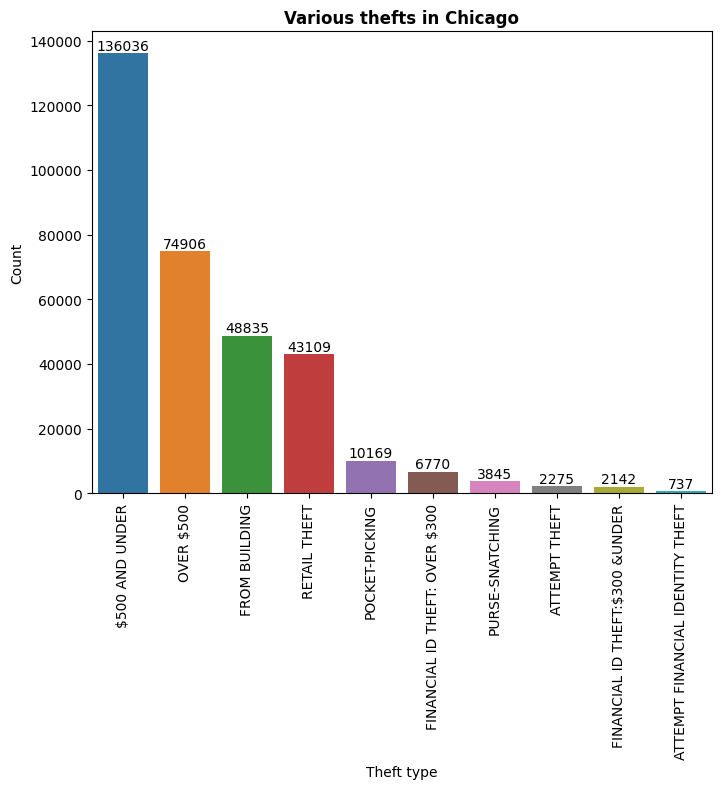

In [41]:
topthefts = df[df['Primary Type'] == 'THEFT']['Description'].value_counts()[:10]
plt.figure(figsize=(8,6))
ax = sns.barplot(x=topthefts.index, y=topthefts.values)
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Theft type')
plt.ylabel('Count')
plt.title('Various thefts in Chicago', weight='bold')
plt.xticks(rotation=90)
plt.show()

In [42]:
# fig = px.scatter_mapbox(df.sample(frac=0.09), lat="Latitude", lon="Longitude",
#                     zoom=8, height=600, size_max=30, color='Primary Type')
# fig.update_layout(mapbox_style="carto-darkmatter", margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

### Thanks for reading!